In [48]:
import numpy as np
import csv
import pandas as pd

In [49]:
#Liste contenant les noms des colonnes de la Dataframe
col_names = ['case_month','res_state', 'state_fips_code', 'res_county' ,'county_fips_code' ,'age_group' ,'sex' ,'race' ,'ethnicity','case_positive_specimen_interval' ,'case_onset_interval','process' ,'exposure_yn' ,'current_status','symptom_status','hosp_yn', 'icu_yn','death_yn' ,'underlying_conditions_yn' ]

#Import des données
df = pd.read_csv('CDC_Data_orig.csv', encoding='ISO-8859-1', header=0, names=col_names, index_col=False, low_memory=False)

In [50]:
df_encoder = df.copy()

In [51]:
#On encode les données pour que les modéles puis les traiter
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for colonne in df.columns :
    df_encoder[colonne] = le.fit_transform(df[colonne])
    
df_encoder['death_yn'].head(100)


0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: death_yn, Length: 100, dtype: int32

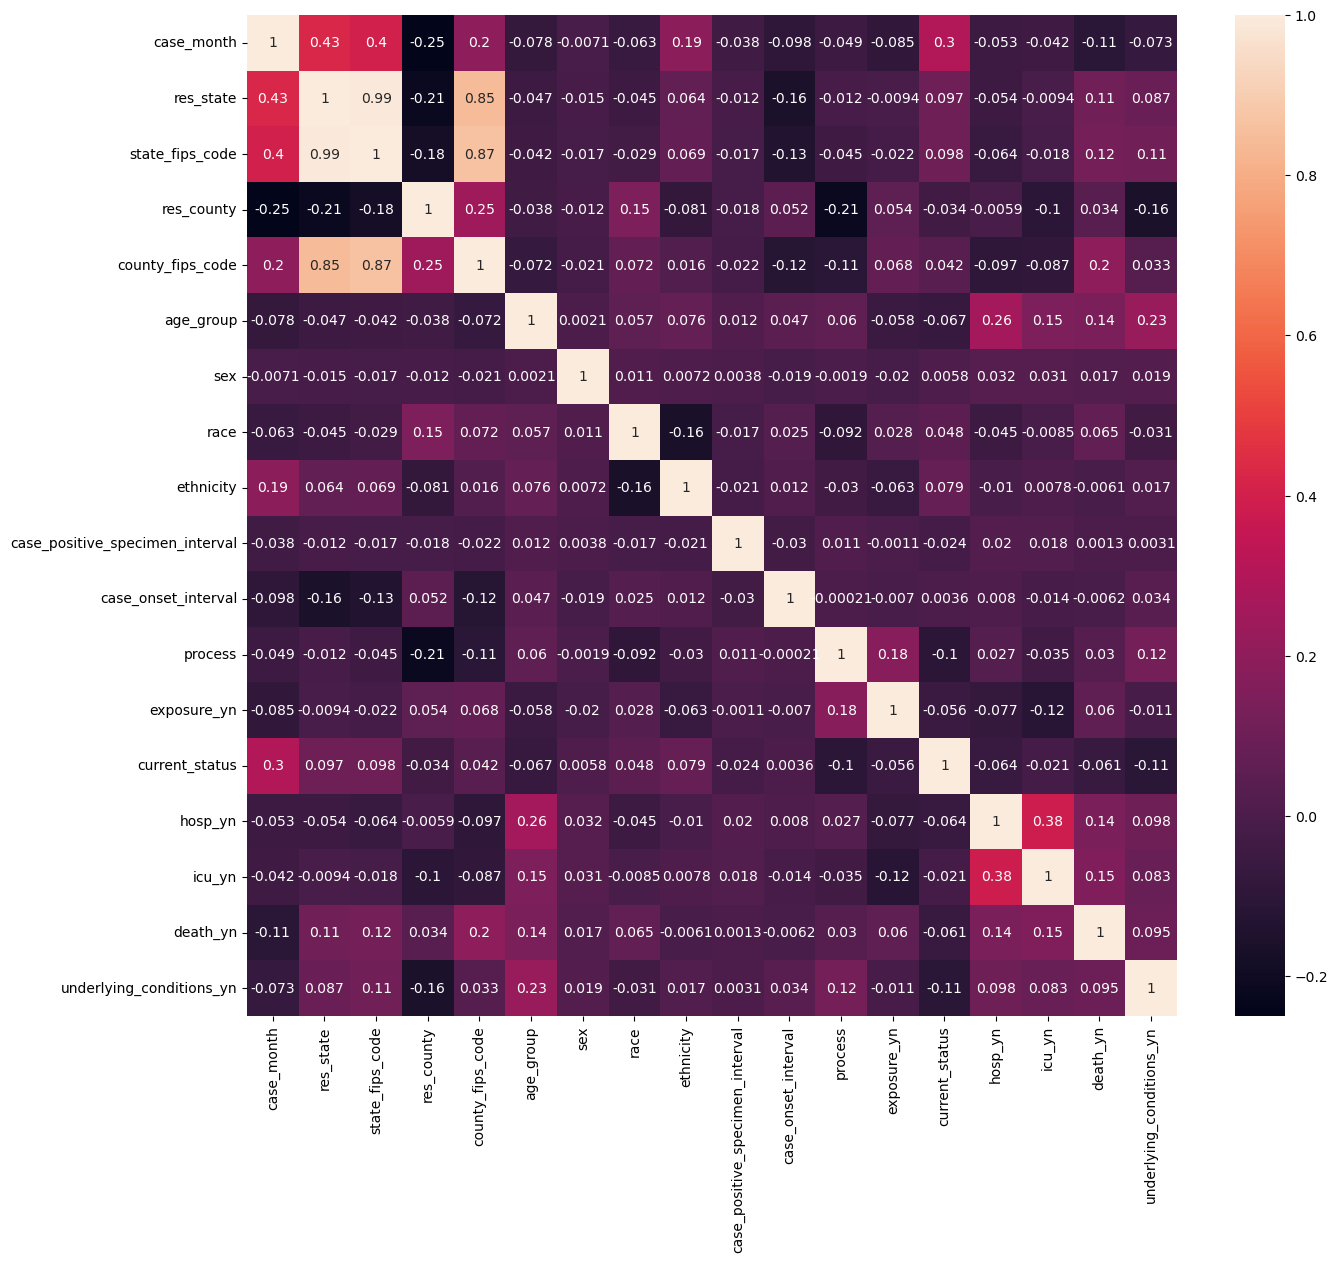

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_df = df_encoder.drop(['symptom_status'], axis=1).corr(method='pearson')

plt.figure(figsize=(15, 13))
sns.heatmap(corr_df, annot=True)
plt.show()

In [53]:
df['case_month'].head(10)

0    2020-04
1    2020-07
2    2020-11
3    2020-08
4    2020-07
5    2020-07
6    2020-08
7    2020-08
8    2020-08
9    2020-07
Name: case_month, dtype: object

### Analyse univarié

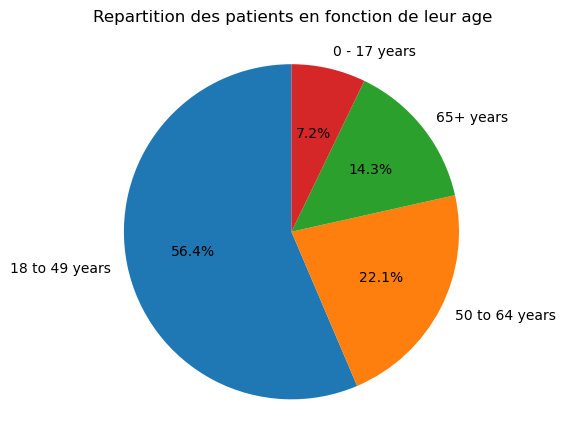

In [54]:
plt.pie(df_encoder['age_group'].value_counts().tolist(), labels=df['age_group'].value_counts().index.tolist(), startangle=90, autopct='%1.1f%%')
plt.title("Repartition des patients en fonction de leur age\n")
plt.axis('equal')
plt.show()

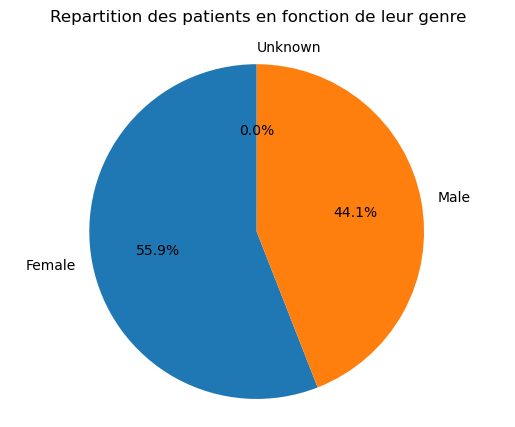

In [55]:
plt.pie(df_encoder['sex'].value_counts().tolist(), labels=df['sex'].value_counts().index.tolist(), startangle=90, autopct='%1.1f%%')
plt.title("Repartition des patients en fonction de leur genre\n")
plt.axis('equal')
plt.show()

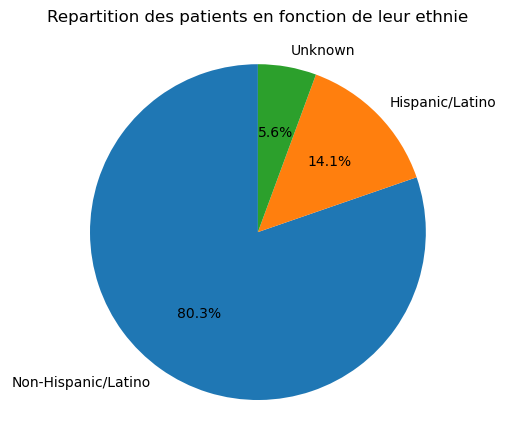

In [56]:
plt.pie(df_encoder['ethnicity'].value_counts().tolist(), labels=df['ethnicity'].value_counts().index.tolist(), startangle=90, autopct='%1.1f%%')
plt.title("Repartition des patients en fonction de leur ethnie\n")
plt.axis('equal')
plt.show()

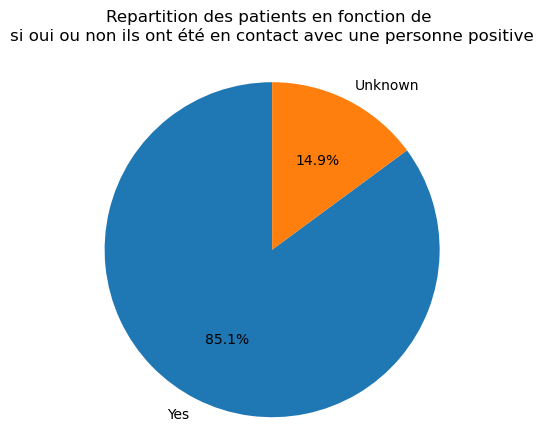

In [57]:
plt.pie(df_encoder['exposure_yn'].value_counts().tolist(), labels=df['exposure_yn'].value_counts().index.tolist(), startangle=90, autopct='%1.1f%%')
plt.title("Repartition des patients en fonction de \nsi oui ou non ils ont été en contact avec une personne positive\n")
plt.axis('equal')
plt.show()

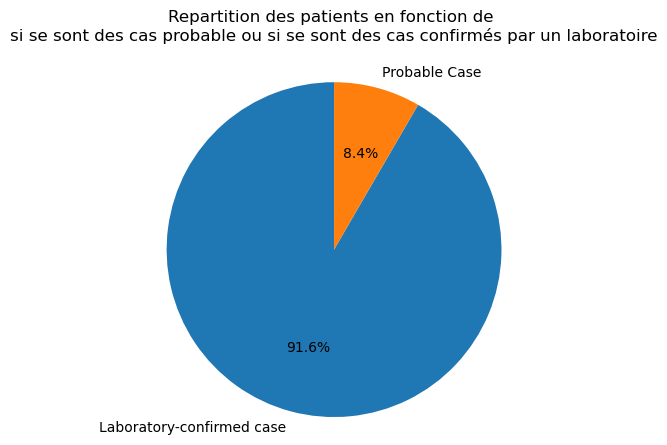

In [58]:
plt.pie(df_encoder['current_status'].value_counts().tolist(), labels=df['current_status'].value_counts().index.tolist(), startangle=90, autopct='%1.1f%%')
plt.title("Repartition des patients en fonction de \nsi se sont des cas probable ou si se sont des cas confirmés par un laboratoire\n")
plt.axis('equal')
plt.show()

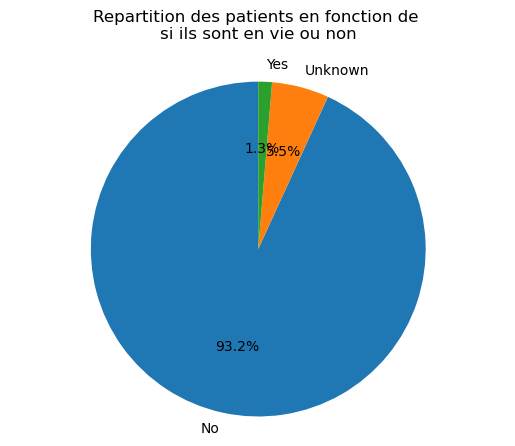

In [59]:
plt.pie(df_encoder['death_yn'].value_counts().tolist(), labels=df['death_yn'].value_counts().index.tolist(), startangle=90, autopct='%1.1f%%')
plt.title("Repartition des patients en fonction de \nsi ils sont en vie ou non\n")
plt.axis('equal')
plt.show()

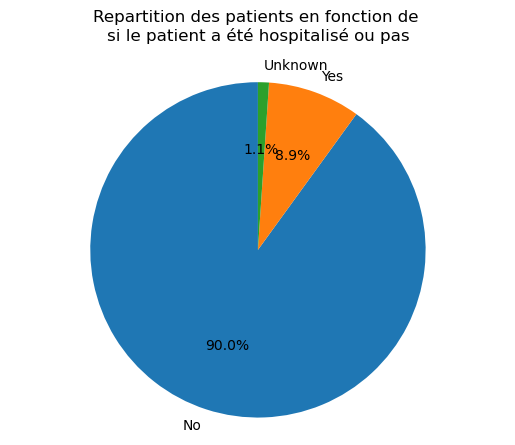

In [60]:
plt.pie(df_encoder['hosp_yn'].value_counts().tolist(), labels=df['hosp_yn'].value_counts().index.tolist(), startangle=90, autopct='%1.1f%%')
plt.title("Repartition des patients en fonction de \nsi le patient a été hospitalisé ou pas\n")
plt.axis('equal')
plt.show()

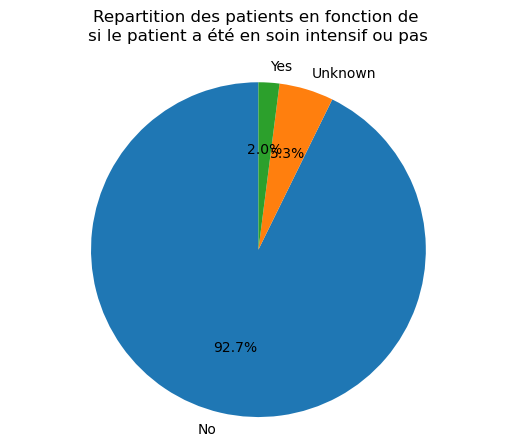

In [61]:
plt.pie(df_encoder['icu_yn'].value_counts().tolist(), labels=df['icu_yn'].value_counts().index.tolist(), startangle=90, autopct='%1.1f%%')
plt.title("Repartition des patients en fonction de \nsi le patient a été en soin intensif ou pas\n")
plt.axis('equal')
plt.show()

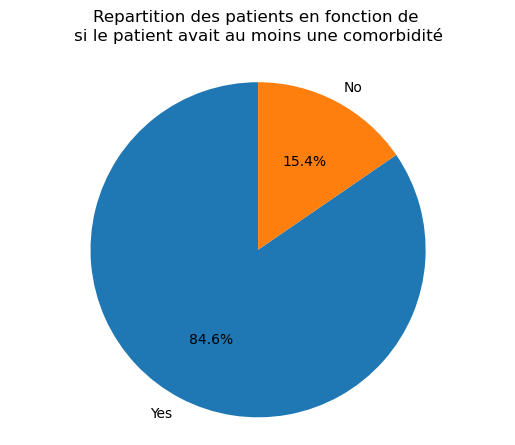

In [62]:
plt.pie(df_encoder['underlying_conditions_yn'].value_counts().tolist(), labels=df['underlying_conditions_yn'].value_counts().index.tolist(), startangle=90, autopct='%1.1f%%')
plt.title("Repartition des patients en fonction de \nsi le patient avait au moins une comorbidité\n")
plt.axis('equal')
plt.show()

### Analyse bivarié

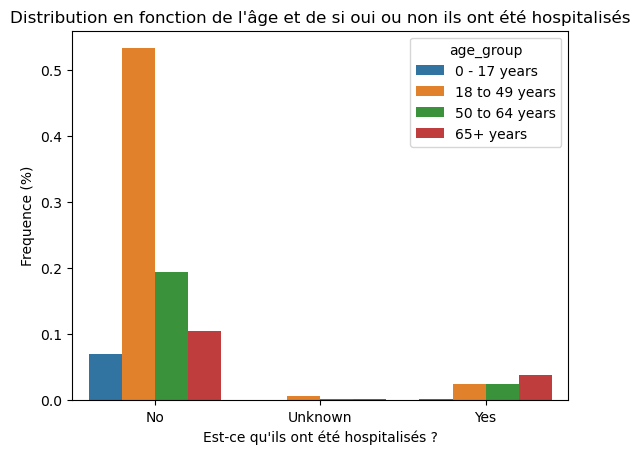

In [109]:
freq = df.groupby(["hosp_yn", "age_group"]).size().reset_index(name="counts")
freq["percentage"] = freq["counts"] / freq["counts"].sum()

sns.barplot(x="hosp_yn", y="percentage", hue="age_group", data=freq)

plt.xlabel("Est-ce qu'ils ont été hospitalisés ?")
plt.ylabel("Frequence (%)")
plt.title("Distribution en fonction de l'âge et de si oui ou non ils ont été hospitalisés")

plt.show()

On peut voir que plus de la 90% des gens n'ayant pas été hospital ont en dessous de 65 ans. Par contre pour les persoones ayant été hospitalisé, c'est les plus de 65 ans qui domine. On peut en conclure que l'age a un impact sur le risque d'hospitalisation.

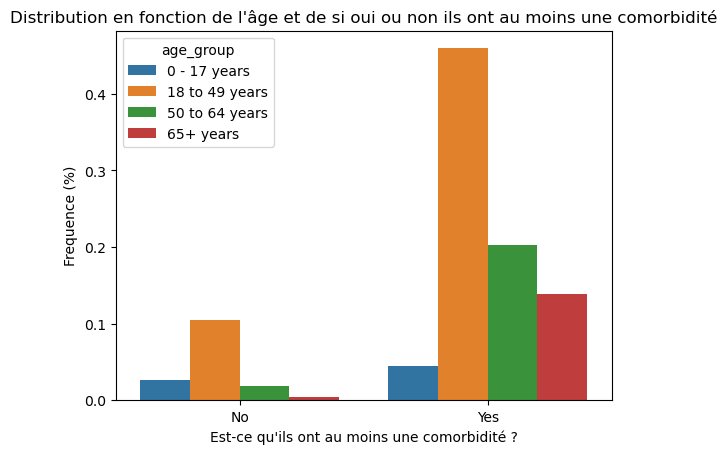

In [111]:
freq = df.groupby(["underlying_conditions_yn", "age_group"]).size().reset_index(name="counts")
freq["percentage"] = freq["counts"] / freq["counts"].sum()

sns.barplot(x="underlying_conditions_yn", y="percentage", hue="age_group", data=freq)

plt.xlabel("Est-ce qu'ils ont au moins une comorbidité ?")
plt.ylabel("Frequence (%)")
plt.title("Distribution en fonction de l'âge et de si oui ou non ils ont au moins une comorbidité")

plt.show()

Dans les deux cas, les 18-49 ans représentent la majorité, ce qui est normal puisque c'est le groupe majoritaire. Néanmoins, on peut voir que le pourcentage de 50-64 et 65 ans et plus augmente fortement entre les réponses "oui" et "non" passant respectivement de moins de 2% à plus de 20% et de 0,4% à 13%.

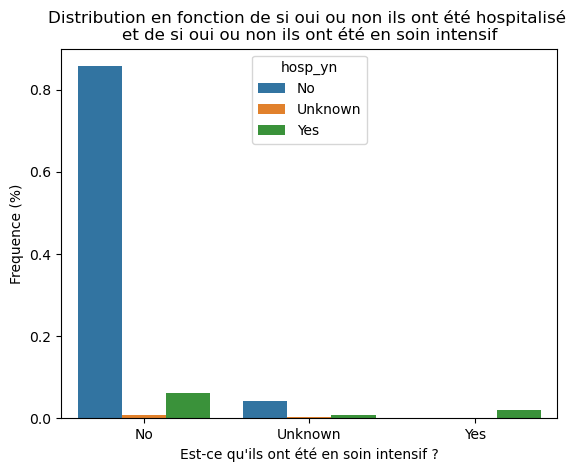

In [117]:
freq = df.groupby(["icu_yn", "hosp_yn"]).size().reset_index(name="counts")
freq["percentage"] = freq["counts"] / freq["counts"].sum()

sns.barplot(x="icu_yn", y="percentage", hue="hosp_yn", data=freq)

plt.xlabel("Est-ce qu'ils ont été en soin intensif ?")
plt.ylabel("Frequence (%)")
plt.title("Distribution en fonction de si oui ou non ils ont été hospitalisé \net de si oui ou non ils ont été en soin intensif")

plt.show()

On peut voir que 85% des gens n'ont ni été hospitalisé ni en soin intensif, ce qui est logique. On voit aussi que 94% des personnes ayant été en soin intensif ont d'abord été hospitalisé, cette différence est normal puis qu'être en soin intensif depuis le domicile est quelque choses 

In [116]:
freq

,icu_yn,hosp_yn,counts,percentage
0,No,No,82284,0.857268
1,No,Unknown,762,0.007939
2,No,Yes,5958,0.062073
3,Unknown,No,3996,0.041632
4,Unknown,Unknown,250,0.002605
5,Unknown,Yes,799,0.008324
6,Yes,No,118,0.001229
7,Yes,Yes,1817,0.018930


## No Feature Selection

In [63]:
X = df_encoder.drop(['death_yn'], axis=1).to_numpy()
y = df_encoder['death_yn'].to_numpy()

In [64]:
#La fonction calcule le score ROC AUC
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        #création d'une liste de toutes les classes à l'exception de la classe actuelle 
        other_class = [x for x in unique_class if x != per_class]

        #met la classe actuelle à 1 et les autres à 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #utilisation de la méthode sklearn metrics pour calculer le roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc
    
    check = pd.DataFrame(roc_auc_dict.items())
    return np.mean(check)

##########################  SVM Classifier  ################################
def svm_fun(X_train,y_train,X_test,y_test):
    #Création d'un classifeur SVM
    clf = svm.SVC(kernel='linear')

    #Entrainement du modele
    clf.fit(X_train, y_train)

    #Prediction de la reponse avec le set de test
    y_pred = clf.predict(X_test)
    
    svm_acc = metrics.accuracy_score(y_test, y_pred)    
    svm_prec = metrics.precision_score(y_test, y_pred,average='weighted') 
    svm_recall = metrics.recall_score(y_test, y_pred,average='weighted')
    svm_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')    
    svm_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')   
    svm_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix SVM : \n", confuse)
    print("SVM Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    check = [svm_acc,svm_prec,svm_recall,svm_f1_weighted,svm_f1_macro,svm_f1_micro,macro_roc_auc_ovo[1]]
    return(check)
    

##########################  NB Classifier  ################################
def gaus_nb_fun(X_train,y_train,X_test,y_test):
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    NB_acc = metrics.accuracy_score(y_test, y_pred)
    NB_prec = metrics.precision_score(y_test, y_pred,average='weighted')    
    NB_recall = metrics.recall_score(y_test, y_pred,average='weighted')
    NB_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
    NB_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
    NB_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix NB : \n", confuse)
    print("NB Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    check = [NB_acc,NB_prec,NB_recall,NB_f1_weighted,NB_f1_macro,NB_f1_micro,macro_roc_auc_ovo[1]]
    return(check)

##########################  MLP Classifier  ################################
def mlp_fun(X_train,y_train,X_test,y_test):
    scaler = StandardScaler()  
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)  
    X_test_2 = scaler.transform(X_test)

    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test_2)
    
    MLP_acc = metrics.accuracy_score(y_test, y_pred)    
    MLP_prec = metrics.precision_score(y_test, y_pred,average='weighted') 
    MLP_recall = metrics.recall_score(y_test, y_pred,average='weighted')    
    MLP_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')    
    MLP_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')    
    MLP_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix MLP : \n", confuse)
    print("MLP Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')    
    check = [MLP_acc,MLP_prec,MLP_recall,MLP_f1_weighted,MLP_f1_macro,MLP_f1_micro,macro_roc_auc_ovo[1]]
    return(check)

##########################  knn Classifier  ################################
def knn_fun(X_train,y_train,X_test,y_test):
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    knn_acc = metrics.accuracy_score(y_test, y_pred)    
    knn_prec = metrics.precision_score(y_test, y_pred,average='weighted')    
    knn_recall = metrics.recall_score(y_test, y_pred,average='weighted')   
    knn_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')   
    knn_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')   
    knn_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix KNN : \n", confuse)
    print("KNN Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')  
    check = [knn_acc,knn_prec,knn_recall,knn_f1_weighted,knn_f1_macro,knn_f1_micro,macro_roc_auc_ovo[1]]
    return(check)

##########################  Random Forest Classifier  ################################
def rf_fun(X_train,y_train,X_test,y_test):
    # Import the model we are using
    from sklearn.ensemble import RandomForestClassifier
    # Instanciation du model avec 1000 arbres de decision
    rf = RandomForestClassifier(n_estimators = 100)
    # Entrainement du modele
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    fr_acc = metrics.accuracy_score(y_test, y_pred)   
    fr_prec = metrics.precision_score(y_test, y_pred,average='weighted')   
    fr_recall = metrics.recall_score(y_test, y_pred,average='weighted')   
    fr_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')  
    fr_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')    
    fr_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix RF : \n", confuse)
    print("RF Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')   
    check = [fr_acc,fr_prec,fr_recall,fr_f1_weighted,fr_f1_macro,fr_f1_micro,macro_roc_auc_ovo[1]]
    return(check)

##########################  Logistic Regression Classifier  ################################
def lr_fun(X_train,y_train,X_test,y_test):

    model = LogisticRegression(solver='liblinear', random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    LR_acc = metrics.accuracy_score(y_test, y_pred)
    LR_prec = metrics.precision_score(y_test, y_pred,average='weighted')    
    LR_recall = metrics.recall_score(y_test, y_pred,average='weighted')    
    LR_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')   
    LR_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')   
    LR_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix LR : \n", confuse)
    print("LR Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')    
    check = [LR_acc,LR_prec,LR_recall,LR_f1_weighted,LR_f1_macro,LR_f1_micro,macro_roc_auc_ovo[1]]
    return(check)


def fun_decision_tree(X_train,y_train,X_test,y_test):
    from sklearn import tree
    
    clf = tree.DecisionTreeClassifier()    
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    dt_acc = metrics.accuracy_score(y_test, y_pred)    
    dt_prec = metrics.precision_score(y_test, y_pred,average='weighted')    
    dt_recall = metrics.recall_score(y_test, y_pred,average='weighted')    
    dt_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')    
    dt_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')    
    dt_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix DT : \n", confuse)
    print("DT Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [dt_acc,dt_prec,dt_recall,dt_f1_weighted,dt_f1_macro,dt_f1_micro,macro_roc_auc_ovo[1]]
    return(check)

In [65]:
counter = 1

svm_table = []
gauu_nb_table = []
mlp_table = []
knn_table = []
rf_table = []
lr_table = []
dt_table = []

#On sépare la base de données en train set et test set
from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit
sss = ShuffleSplit(n_splits=1, test_size=0.3)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y)) 

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [66]:
X_train.shape,X_test.shape

((67188, 18), (28796, 18))

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import svm
import timeit

start = timeit.default_timer()
gauu_nb_return = gaus_nb_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("NB Time : ", stop - start) 

start = timeit.default_timer()
mlp_return = mlp_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("MLP Time : ", stop - start) 

start = timeit.default_timer()
knn_return = knn_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("KNN Time : ", stop - start) 

start = timeit.default_timer()
rf_return = rf_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("RF Time : ", stop - start) 

start = timeit.default_timer()
lr_return = lr_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("LR Time : ", stop - start) 

start = timeit.default_timer()
dt_return = fun_decision_tree(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("DT Time : ", stop - start) 

start = timeit.default_timer()
svm_return = svm_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("SVM Time : ", stop - start) 

gauu_nb_table.append(gauu_nb_return)
mlp_table.append(mlp_return)
knn_table.append(knn_return)
rf_table.append(rf_return)
lr_table.append(lr_return)
dt_table.append(dt_return)
svm_table.append(svm_return)
     
svm_table_final = pd.DataFrame(svm_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
gauu_nb_table_final = pd.DataFrame(gauu_nb_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
mlp_table_final = pd.DataFrame(mlp_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
knn_table_final = pd.DataFrame(knn_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
rf_table_final = pd.DataFrame(rf_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
lr_table_final = pd.DataFrame(lr_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])

dt_table_final = pd.DataFrame(dt_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])

Confusion Matrix NB : 
 [[19029  4974  2778]
 [  182  1369    57]
 [   18    41   348]]
NB Class Wise Accuracy :  [0.71054106 0.85136816 0.85503686]
NB Time :  0.1565491999999722


C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Confusion Matrix MLP : 
 [[26316   398    67]
 [  982   626     0]
 [  331     7    69]]
MLP Class Wise Accuracy :  [0.98263694 0.38930348 0.16953317]
MLP Time :  38.61754229999997


C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Confusion Matrix KNN : 
 [[26210   460   111]
 [  766   840     2]
 [  304    14    89]]
KNN Class Wise Accuracy :  [0.97867891 0.52238806 0.21867322]
KNN Time :  34.8720308999998


C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Confusion Matrix RF : 
 [[26200   462   119]
 [  735   872     1]
 [  281    12   114]]
RF Class Wise Accuracy :  [0.97830552 0.54228856 0.28009828]
RF Time :  4.726299400000016


C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Confusion Matrix LR : 
 [[26618   141    22]
 [ 1459   149     0]
 [  389     5    13]]
LR Class Wise Accuracy :  [0.9939136  0.09266169 0.03194103]
LR Time :  2.596324500000037


C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Confusion Matrix DT : 
 [[26087   503   191]
 [  795   811     2]
 [  274    14   119]]
DT Class Wise Accuracy :  [0.97408611 0.50435323 0.29238329]
DT Time :  0.3016699999998309


C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Confusion Matrix SVM : 
 [[26781     0     0]
 [ 1608     0     0]
 [  407     0     0]]
SVM Class Wise Accuracy :  [1. 0. 0.]
SVM Time :  286.4372211


C:\Users\akims\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Pour le NB, les scores sont sensiblements pareil mis à part pour "Yes" qui est supérieur de 0.27.

Pour le MLP, les scores sont à peu prés pareil mis à part pour "Unknown" qui est inférieur à 0.38.

Pour le KNN, les scores sont pareils à 0.06 prés.

Pour le LR les scores sont pareils à 0.1 prés.

Pour le DT, les scores sont à peu prés pareil mis à part pour "Unknown" qui est inférieur à 0.16.

In [68]:
#taking average of all k-fold performance values
final_mean_mat = []

final_mean_mat.append(np.transpose((list(svm_table_final.mean()))))
final_mean_mat.append(np.transpose((list(gauu_nb_table_final.mean()))))
final_mean_mat.append(np.transpose((list(mlp_table_final.mean()))))
final_mean_mat.append(np.transpose((list(knn_table_final.mean()))))
final_mean_mat.append(np.transpose((list(rf_table_final.mean()))))
final_mean_mat.append(np.transpose((list(lr_table_final.mean()))))
final_mean_mat.append(np.transpose((list(dt_table_final.mean()))))

final_avg_mat = pd.DataFrame(final_mean_mat,columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"], 
                          index=["SVM","NB","MLP","KNN","RF","LR","DT"])

### Comparatifs

Voila les resultats que nous avons trouvé :

In [69]:
final_avg_mat

,Accuracy,Precision,Recall,F1 (weighted),F1 (Macro),F1 (Micro),ROC AUC
SVM,0.930025,0.864947,0.930025,0.896306,0.321248,0.930025,0.500000
NB,0.720447,0.933872,0.720447,0.791158,0.454544,0.720447,0.838895
MLP,0.938012,0.926904,0.938012,0.929718,0.565296,0.938012,0.645434
KNN,0.942457,0.935472,0.942457,0.938031,0.612292,0.942457,0.694551
RF,0.944089,0.938368,0.944089,0.940514,0.638835,0.944089,0.712469
LR,0.929990,0.903102,0.929990,0.905748,0.393006,0.929990,0.532542
DT,0.938221,0.932907,0.938221,0.935154,0.616927,0.938221,0.702415


Voila les résultats que le chercheur a trouvé :

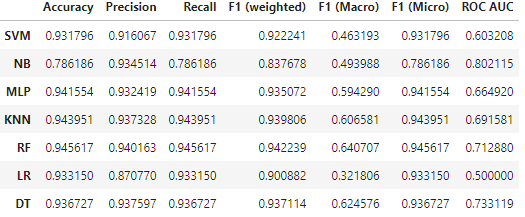

In [70]:
from IPython.display import Image
Image(filename='No features select from github.png')

Si l'on compare les deux tableaux, on peut voir que les résultats sont du même ordre pour chaque score et chaque modèle.

## Boruta for Feature Selection

In [72]:
X_df = pd.DataFrame(X)
X_df.columns = ["c1","c2","c3","c4","c5","c6","c7","c8","c9","c10","c11","c12","c13","c14","c15","c16","c17", "c18"]
X_df

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18
0,1,6,5,63,68,1,1,5,0,59,0,9,0,0,0,0,0,1
1,4,6,5,180,86,1,0,5,0,59,0,1,1,0,0,0,0,0
2,8,6,5,75,71,1,1,6,0,60,0,3,1,1,0,0,0,0
3,5,6,5,102,74,1,0,6,0,59,0,8,1,0,0,0,0,0
4,4,6,5,140,81,1,1,6,0,59,0,2,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95979,6,11,9,35,96,2,1,6,2,59,0,8,1,0,0,0,0,1
95980,6,11,9,35,96,2,1,6,2,59,0,3,1,0,0,0,0,1
95981,6,11,9,35,96,2,1,6,2,59,0,3,1,0,0,0,0,1
95982,6,11,9,35,96,2,1,6,2,59,0,8,1,0,0,0,0,1


In [73]:
np.random.seed(42)
X_shadow = X_df.apply(np.random.permutation)
X_shadow.columns = ['shadow_' + feat for feat in X_df.columns]
### make X_boruta by appending X_shadow to X
X_boruta = pd.concat([X_df, X_shadow], axis = 1)

In [74]:
X_boruta

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,shadow_c9,shadow_c10,shadow_c11,shadow_c12,shadow_c13,shadow_c14,shadow_c15,shadow_c16,shadow_c17,shadow_c18
0,1,6,5,63,68,1,1,5,0,59,...,1,59,0,2,0,0,0,0,0,1
1,4,6,5,180,86,1,0,5,0,59,...,1,63,0,2,1,0,0,0,0,0
2,8,6,5,75,71,1,1,6,0,60,...,1,59,0,3,1,0,0,0,0,1
3,5,6,5,102,74,1,0,6,0,59,...,1,59,0,8,1,0,0,0,0,1
4,4,6,5,140,81,1,1,6,0,59,...,1,60,0,3,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95979,6,11,9,35,96,2,1,6,2,59,...,2,59,0,3,1,0,0,0,0,1
95980,6,11,9,35,96,2,1,6,2,59,...,1,60,0,1,1,0,0,0,0,1
95981,6,11,9,35,96,2,1,6,2,59,...,1,59,0,0,1,0,0,2,0,1
95982,6,11,9,35,96,2,1,6,2,59,...,1,59,0,3,0,0,0,0,0,0


In [75]:
from sklearn.ensemble import RandomForestRegressor
### Entrain le modele random forest
forest = RandomForestRegressor(max_depth = 5, random_state = 42)
forest.fit(X_boruta, y)
### Enregistrer les importances des caractéristiques
feat_imp_X = forest.feature_importances_[:len(X_df.columns)]
feat_imp_shadow = forest.feature_importances_[len(X_df.columns):]
### calcule de hits hits
hits = feat_imp_X > feat_imp_shadow.max()

In [76]:
hits

array([ True,  True,  True,  True,  True,  True, False, False,  True,
       False, False,  True, False, False, False,  True,  True,  True])

In [77]:
indices_tmp = []

for i in range(len(hits)):
    if(hits[i]==True):
        indices_tmp.append(i)

In [78]:
final_boruta_data = np.array(X_df.iloc[:,indices_tmp])

In [79]:
X = final_boruta_data
y = df_encoder['death_yn'].to_numpy()


counter = 1
svm_table = []
gauu_nb_table = []
mlp_table = []
knn_table = []
rf_table = []
lr_table = []
dt_table = []


from sklearn.model_selection import ShuffleSplit 
sss = ShuffleSplit(n_splits=1, test_size=0.3)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y)) 

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [80]:
import timeit

start = timeit.default_timer()
gauu_nb_return = gaus_nb_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("NB Time : ", stop - start) 

start = timeit.default_timer()
mlp_return = mlp_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("MLP Time : ", stop - start) 

start = timeit.default_timer()
knn_return = knn_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("KNN Time : ", stop - start) 

start = timeit.default_timer()
rf_return = rf_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("RF Time : ", stop - start) 

start = timeit.default_timer()
lr_return = lr_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("LR Time : ", stop - start) 

start = timeit.default_timer()
dt_return = fun_decision_tree(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("DT Time : ", stop - start) 

gauu_nb_table.append(gauu_nb_return)
mlp_table.append(mlp_return)
knn_table.append(knn_return)
rf_table.append(rf_return)
lr_table.append(lr_return)
dt_table.append(dt_return)
     
gauu_nb_table_final = pd.DataFrame(gauu_nb_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
mlp_table_final = pd.DataFrame(mlp_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
knn_table_final = pd.DataFrame(knn_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
rf_table_final = pd.DataFrame(rf_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
lr_table_final = pd.DataFrame(lr_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])

dt_table_final = pd.DataFrame(dt_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])

Confusion Matrix NB : 
 [[21349  4015  1488]
 [  185  1325    48]
 [   54    26   306]]
NB Class Wise Accuracy :  [0.79506182 0.85044929 0.79274611]
NB Time :  0.18255790000011984


C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Confusion Matrix MLP : 
 [[26322   471    59]
 [  891   667     0]
 [  295    11    80]]
MLP Class Wise Accuracy :  [0.98026218 0.42811297 0.20725389]
MLP Time :  33.09846740000012


C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Confusion Matrix KNN : 
 [[26234   517   101]
 [  706   851     1]
 [  255     9   122]]
KNN Class Wise Accuracy :  [0.97698495 0.54621309 0.31606218]
KNN Time :  2.004665100000011


C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Confusion Matrix RF : 
 [[26250   497   105]
 [  695   860     3]
 [  243     6   137]]
RF Class Wise Accuracy :  [0.97758081 0.55198973 0.35492228]
RF Time :  3.746415999999954


C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Confusion Matrix LR : 
 [[26668   157    27]
 [ 1413   145     0]
 [  374     1    11]]
LR Class Wise Accuracy :  [0.99314762 0.09306804 0.02849741]
LR Time :  1.7381239999999707


C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Confusion Matrix DT : 
 [[26264   482   106]
 [  728   827     3]
 [  257     9   120]]
DT Class Wise Accuracy :  [0.97810219 0.53080873 0.31088083]
DT Time :  0.23126330000013695


C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Avec cette selection de feature, le score de l'accuracy ne bouge pas.

In [81]:
final_mean_mat = []

final_mean_mat.append(np.transpose((list(gauu_nb_table_final.mean()))))
final_mean_mat.append(np.transpose((list(mlp_table_final.mean()))))
final_mean_mat.append(np.transpose((list(knn_table_final.mean()))))
final_mean_mat.append(np.transpose((list(rf_table_final.mean()))))
final_mean_mat.append(np.transpose((list(lr_table_final.mean()))))
final_mean_mat.append(np.transpose((list(dt_table_final.mean()))))

final_avg_mat = pd.DataFrame(final_mean_mat,columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"], 
                          index=["NB","MLP","KNN","RF","LR","DT"])



Voila les resultats que nous avons trouvé :

In [82]:
final_avg_mat

,Accuracy,Precision,Recall,F1 (weighted),F1 (Macro),F1 (Micro),ROC AUC
NB,0.798028,0.937754,0.798028,0.846344,0.512958,0.798028,0.852148
MLP,0.940026,0.931410,0.940026,0.933802,0.588664,0.940026,0.664296
KNN,0.944819,0.940277,0.944819,0.941985,0.650227,0.944819,0.720336
RF,0.946208,0.941953,0.946208,0.943597,0.664858,0.946208,0.729952
LR,0.931518,0.903701,0.931518,0.908386,0.390693,0.931518,0.531454
DT,0.944958,0.939756,0.944958,0.941725,0.645424,0.944958,0.715207


Voila les résultats que le chercheur a trouvé :

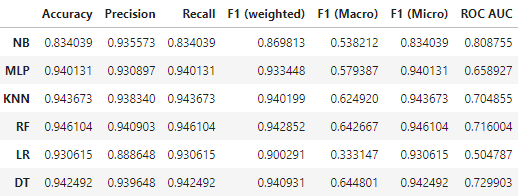

In [83]:
Image(filename='Boruta from github.png')

Tout comme le No Features Selections, les deux tableaux de métrique sont similiaires, elle reste dans le même ordre de grandeur.

## Ridge Regression


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

X = df_encoder.drop(['death_yn'], axis=1).to_numpy()
y = df_encoder['death_yn'].to_numpy()

ridge_data = df_encoder.drop(['death_yn'], axis=1)
                             
X_train, X_test, y_train, y_test = train_test_split(
    ridge_data,y,
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

# L1 = Lasso, L2 = Ridge
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2', solver='liblinear'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

sel_.get_support()

selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 18
selected features: 4
features with coefficients shrank to zero: 3


In [85]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

# L1 = Lasso, L2 = Ridge
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2', solver='liblinear'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

sel_.get_support()

selected_feat_ridge = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat_ridge)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 18
selected features: 4
features with coefficients shrank to zero: 3


In [86]:
Ridge_Regression_data = sel_.transform(ridge_data.fillna(0))


C:\Users\akims\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [87]:
X = Ridge_Regression_data


counter = 1
svm_table = []
gauu_nb_table = []
mlp_table = []
knn_table = []
rf_table = []
lr_table = []
dt_table = []


from sklearn.model_selection import ShuffleSplit 
sss = ShuffleSplit(n_splits=1, test_size=0.3)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y)) 

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [88]:
import timeit

start = timeit.default_timer()
gauu_nb_return = gaus_nb_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("NB Time : ", stop - start) 

start = timeit.default_timer()
mlp_return = mlp_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("MLP Time : ", stop - start) 

start = timeit.default_timer()
knn_return = knn_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("KNN Time : ", stop - start) 

start = timeit.default_timer()
rf_return = rf_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("RF Time : ", stop - start) 

start = timeit.default_timer()
lr_return = lr_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("LR Time : ", stop - start) 

start = timeit.default_timer()
dt_return = fun_decision_tree(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("DT Time : ", stop - start) 

gauu_nb_table.append(gauu_nb_return)
mlp_table.append(mlp_return)
knn_table.append(knn_return)
rf_table.append(rf_return)
lr_table.append(lr_return)
dt_table.append(dt_return)
# svm_table.append(svm_return)

gauu_nb_table_final = pd.DataFrame(gauu_nb_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
mlp_table_final = pd.DataFrame(mlp_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
knn_table_final = pd.DataFrame(knn_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
rf_table_final = pd.DataFrame(rf_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
lr_table_final = pd.DataFrame(lr_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])

dt_table_final = pd.DataFrame(dt_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])

Confusion Matrix NB : 
 [[21984  4269   481]
 [  177  1470    13]
 [  301    45    56]]
NB Class Wise Accuracy :  [0.82232363 0.88554217 0.13930348]
NB Time :  0.12887039999986882


C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Confusion Matrix MLP : 
 [[26514   215     5]
 [ 1505   155     0]
 [  395     1     6]]
MLP Class Wise Accuracy :  [0.99177078 0.09337349 0.01492537]
MLP Time :  24.89936809999972


C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Confusion Matrix KNN : 
 [[26532   195     7]
 [ 1287   373     0]
 [  393     0     9]]
KNN Class Wise Accuracy :  [0.99244408 0.2246988  0.02238806]
KNN Time :  1.7049643999998807


C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Confusion Matrix RF : 
 [[26167   556    11]
 [  861   799     0]
 [  376    16    10]]
RF Class Wise Accuracy :  [0.97879105 0.4813253  0.02487562]
RF Time :  2.4246774999996887


C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\akims\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Confusion Matrix LR : 
 [[26734     0     0]
 [ 1659     1     0]
 [  402     0     0]]
LR Class Wise Accuracy :  [1.00000000e+00 6.02409639e-04 0.00000000e+00]
LR Time :  0.5175528999998278
Confusion Matrix DT : 
 [[26171   556     7]
 [  861   799     0]
 [  377    16     9]]
DT Class Wise Accuracy :  [0.97894067 0.4813253  0.02238806]
DT Time :  0.14642730000014126


C:\Users\akims\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [89]:
#taking average of all k-fold performance values
final_mean_mat = []

# final_mean_mat.append(np.transpose((list(svm_table_final.mean()))))
final_mean_mat.append(np.transpose((list(gauu_nb_table_final.mean()))))
final_mean_mat.append(np.transpose((list(mlp_table_final.mean()))))
final_mean_mat.append(np.transpose((list(knn_table_final.mean()))))
final_mean_mat.append(np.transpose((list(rf_table_final.mean()))))
final_mean_mat.append(np.transpose((list(lr_table_final.mean()))))
final_mean_mat.append(np.transpose((list(dt_table_final.mean()))))

final_avg_mat = pd.DataFrame(final_mean_mat,columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"], 
                          index=["NB","MLP","KNN","RF","LR","DT"])



Voilà le résultat obtenu :

In [90]:
final_avg_mat

,Accuracy,Precision,Recall,F1 (weighted),F1 (Macro),F1 (Micro),ROC AUC
NB,0.816433,0.924709,0.816433,0.854144,0.468776,0.816433,0.739830
MLP,0.926344,0.898012,0.926344,0.901908,0.381083,0.926344,0.528416
KNN,0.934644,0.918817,0.934644,0.916497,0.447880,0.934644,0.569559
RF,0.936797,0.926729,0.936797,0.928509,0.513726,0.936797,0.643937
LR,0.928428,0.919590,0.928428,0.894004,0.321363,0.928428,0.500181
DT,0.936901,0.927908,0.936901,0.928505,0.512339,0.936901,0.643490


Voila les résultats que le chercheur a trouvé :

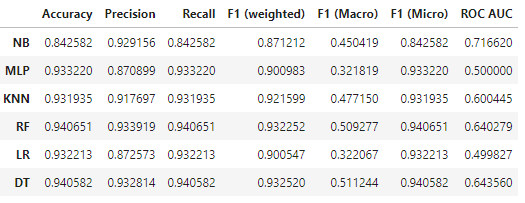

In [92]:
Image(filename='Ridge regression from github.png')

Si l'on compare au No Features Selections, pour le modèle Naive Bayes, l'Accuracy, le Recall, le F1 (weighted) sont meilleurs de 0.1 mais il y a par contre un moins bon ROC.

Pour le reste c'est à peu prés pareil si ce n'est "F1 (Macro)" du Multi-layer Perceptron qui est supérieur de 0.24.